In [1]:
import pandas as pd

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")
print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

In [3]:
print("Missing values in Customers dataset:\n", customers.isnull().sum(), "\n")
print("Missing values in Products dataset:\n", products.isnull().sum(), "\n")
print("Missing values in Transactions dataset:\n", transactions.isnull().sum(), "\n")


Missing values in Customers dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing values in Products dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing values in Transactions dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [4]:
import pandas as pd

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

customers['Region'] = customers['Region'].astype('category')
products['Category'] = products['Category'].astype('category')

customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

print("Data Types After Conversion:")
print(customers.dtypes, "\n")
print(products.dtypes, "\n")
print(transactions.dtypes, "\n")

print("Duplicate Rows Remaining in Customers:", customers.duplicated().sum())
print("Duplicate Rows Remaining in Products:", products.duplicated().sum())
print("Duplicate Rows Remaining in Transactions:", transactions.duplicated().sum())


Data Types After Conversion:
CustomerID              object
CustomerName            object
Region                category
SignupDate      datetime64[ns]
dtype: object 

ProductID        object
ProductName      object
Category       category
Price           float64
dtype: object 

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object 

Duplicate Rows Remaining in Customers: 0
Duplicate Rows Remaining in Products: 0
Duplicate Rows Remaining in Transactions: 0


In [5]:

print("Unique Customers:", customers['CustomerID'].nunique())
print("Unique Products:", products['ProductID'].nunique())
print("Unique Transactions:", transactions['TransactionID'].nunique())

print("\nSummary of Transactions Data:")
print(transactions.describe())


Unique Customers: 200
Unique Products: 100
Unique Transactions: 1000

Summary of Transactions Data:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


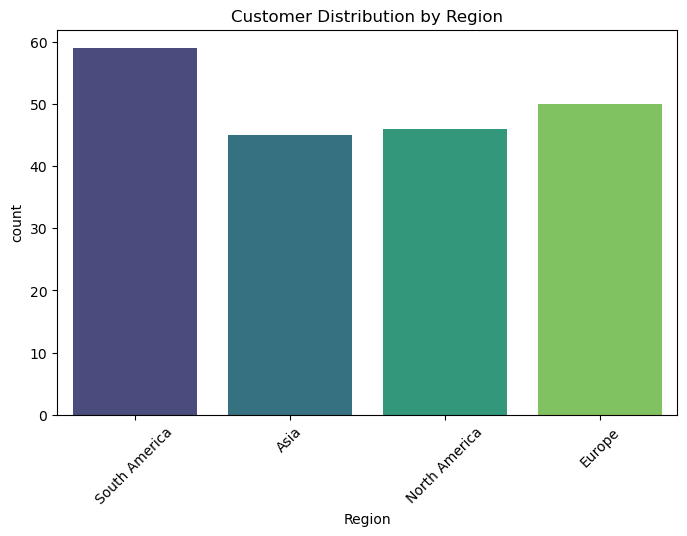

In [2]:
import pandas as pd

customers = pd.read_csv('Customers.csv') 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=customers, hue='Region', palette='viridis', legend=False)
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()




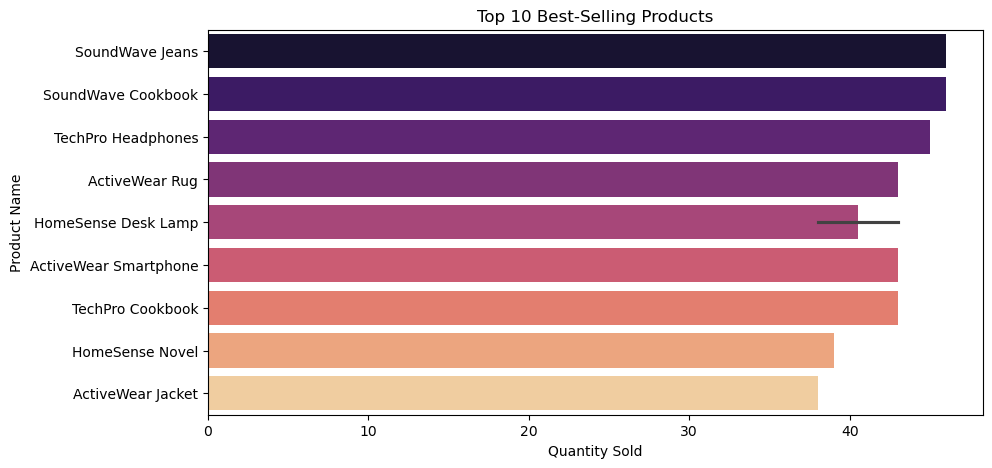

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transactions = pd.read_csv('transactions.csv') 
products = pd.read_csv('products.csv') 

top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products = top_products.reset_index().merge(products[['ProductID', 'ProductName']], on='ProductID')


plt.figure(figsize=(10, 5))
sns.barplot(y='ProductName', x='Quantity', data=top_products, hue='ProductName', palette='magma', legend=False)
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products")
plt.show()



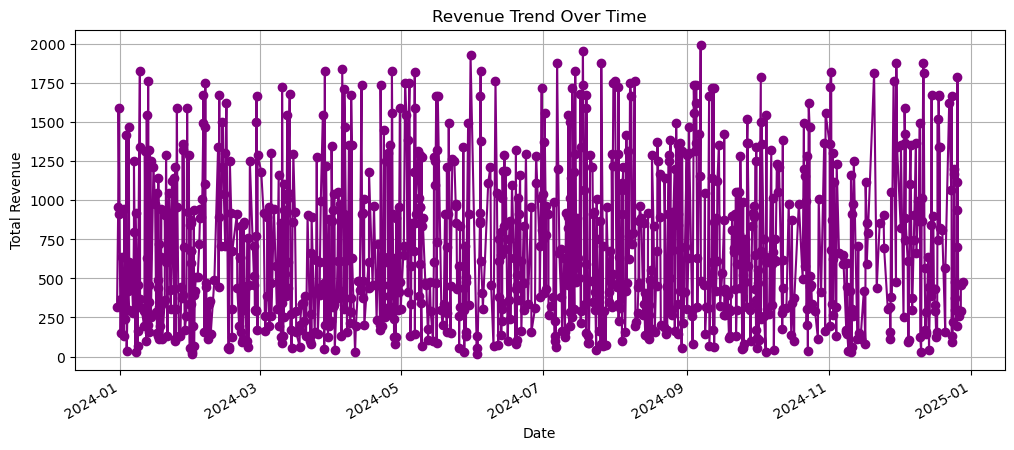

In [8]:
revenue_trend = transactions.groupby('TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(12, 5))
revenue_trend.plot(color='purple', marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.title("Revenue Trend Over Time")
plt.grid(True)
plt.show()


In [9]:
aov = transactions['TotalValue'].sum() / transactions['CustomerID'].nunique()
print("Average Order Value (AOV):", round(aov, 2))


Average Order Value (AOV): 3467.31
